<a href="https://colab.research.google.com/github/mukkatharun/clustering_techniques/blob/main/clustering_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering
from pycaret.clustering import *

In [3]:
data = pd.read_csv('Mall_Customers.csv')

**Data Analysis and preparation**

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.drop('CustomerID',axis =1 , inplace=True)
data.columns = [ 'Gender', 'Age', 'Annual Income','Spending Score']
data.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


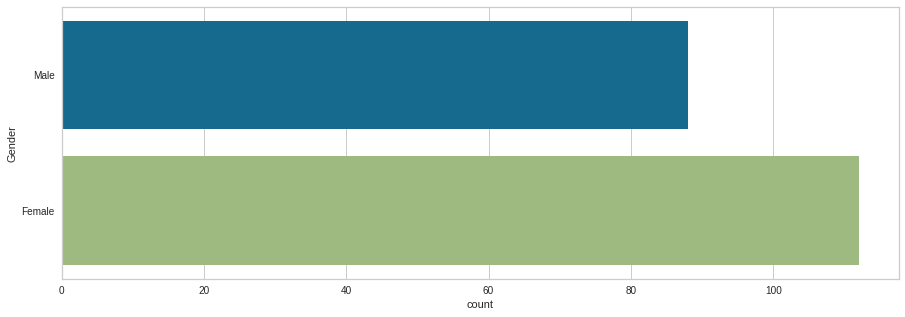

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

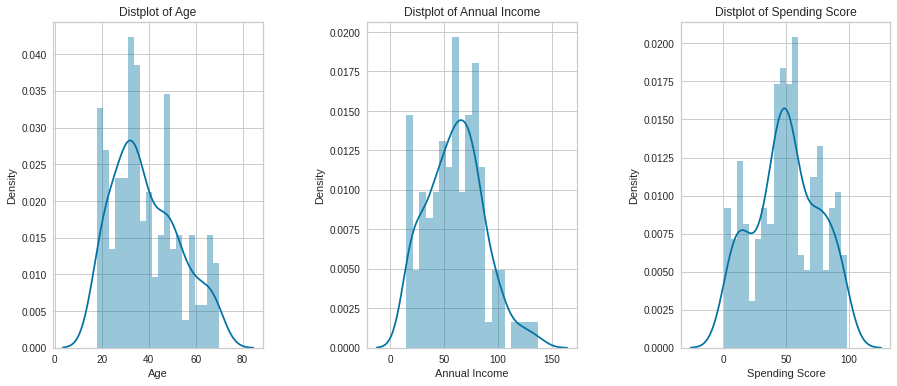

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Relation between Age , Annual Income and Spending Scores


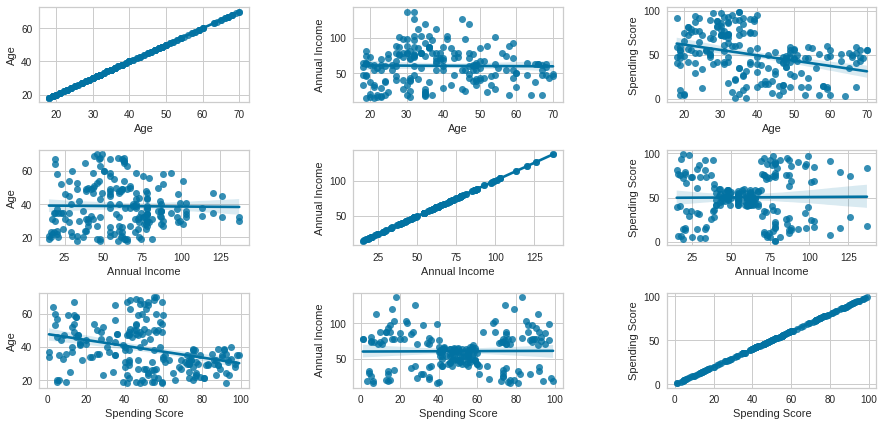

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [11]:
df = data[['Age' , 'Spending Score']]
df.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [12]:
df = df.to_numpy()

**K Means Code**

In [13]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [14]:
label = kmeans(df,3,10)
label

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2])

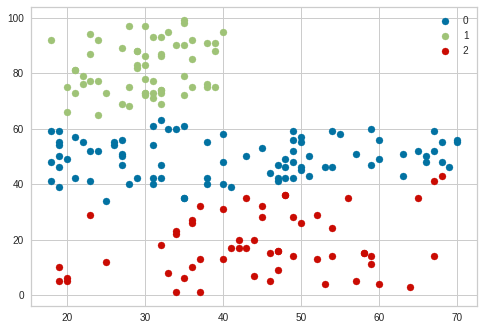

In [16]:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

**Gaussian Mixture**

In [17]:
Gdata = data[['Age' , 'Spending Score']]
Gdata.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


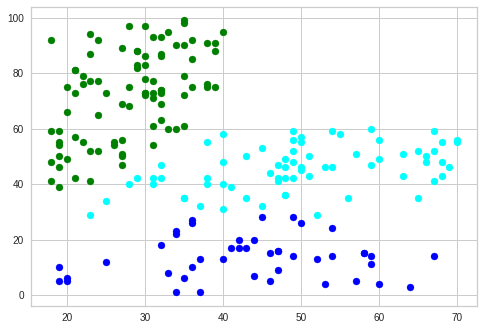

In [18]:
gmm = GaussianMixture(n_components=3)
gmm.fit(Gdata)

labels = gmm.predict(Gdata)
frame = pd.DataFrame(Gdata)
frame['cluster'] = labels
frame.columns = ['Age', 'Spending Score', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Age"],data["Spending Score"],c=color[k])
plt.show()

**DB Scan clustering using pycaret library**

In [24]:
# num_clusters not required for Density-Based Spatial Clustering (‘dbscan’).
# num_clusters param for these models are automatically determined.
reg = setup(data = Gdata)

db = create_model('dbscan')
plot_model(db,plot='cluster')

# DB scan clustering Graph is not getting populated when its pushed to the github. please open the notebook to see it

**Hierarchial_Clustering**

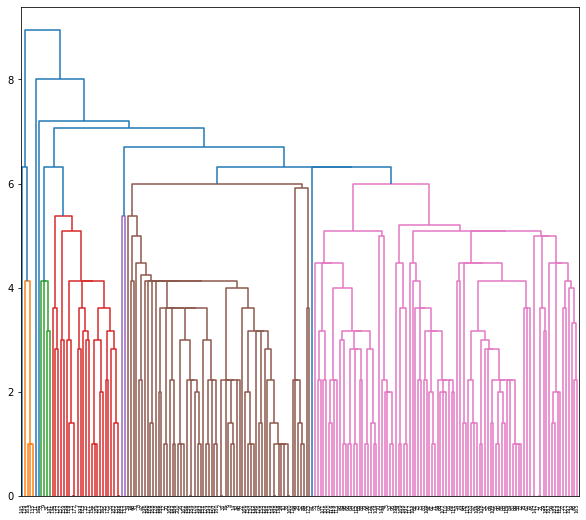

In [21]:
# Single Link
linked = linkage(Gdata, 'single')
labelList= range(1, 201)
plt.figure(figsize=(10, 9))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending')
plt.show()


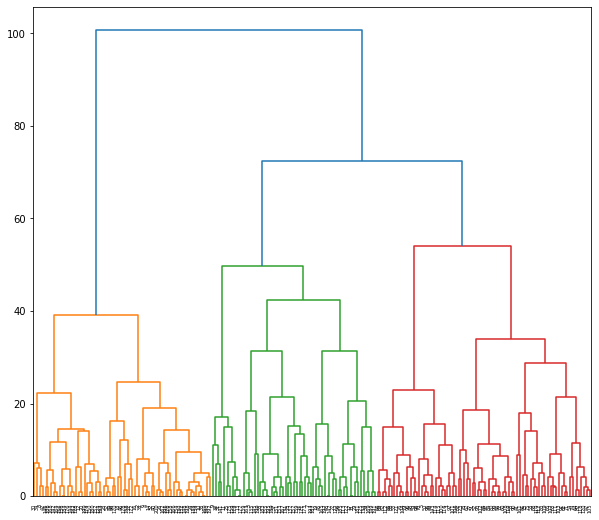

In [22]:
linked = linkage(Gdata, 'complete')
labelList= range(1, 201)
plt.figure(figsize=(10, 9))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending')
plt.show()

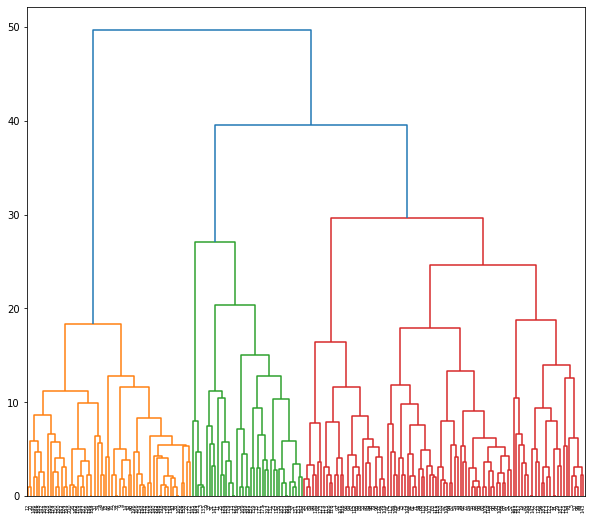

In [23]:
linked = linkage(Gdata, 'average')
labelList= range(1, 201)
plt.figure(figsize=(10, 9))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending')
plt.show()